In [236]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 7:  Linear Algebra Part 2

## Question 1

In a previous homework we computed the Lebesgue constants for a set of interpolation points.  Now we are going to directly relate this to ill-conditioning of a matrix.  For this question let $x_1, \ldots, x_n$ and $y_1, \ldots, y_m$ by $n$ and $m$ equispaced points from $-1$ to $1$ respectively.

**(a)** (12 points) Derive a formula for the $m \times n$ matrix $A$ that maps an $n$-vector of data at $\{x_j\}$ to an $m$-vector of sampled values $\{\mathcal{P}(y_j)\}$, where $\mathcal{P}$ is the degree $n-1$ polynomial interpolant of the data.  Note that this is not simply the Vandermonde matrix (but does involve it).  If you need to assume invertibility of a matrix then justify under what conditions that it is invertible.

**Solution**

Let there be some function f(x) that we can find interpolant $\mathcal{P}$ of. Then our interpolant based on our n-vector of data will be:

$$V_{x}p_{x} = f(x) = \mathcal{P}{(x)}$$

Evaluating this interpolant at our m-vector $y_j$ we get something like:

$$V_{y}p_{x} = \mathcal{P}{(y)}$$

Thus we want A such that:

$$A * f(x) =  \mathcal{P}{(y)}$$

$$AV_{x}p_{x} = V_{y}p_{x}$$

$$
    A \begin{bmatrix} 
    1      & x_1    & x_1^2  & \cdots & x_1^n  \\
    1      & x_2    & x_2^2  & \cdots & x_2^n  \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1      & x_n    & x_n^2  & \cdots & x_n^n  \\
    \end{bmatrix} 
    \begin{bmatrix} 
    p_0   \\
    p_1   \\
    \vdots \\
    p_n \\
    \end{bmatrix}
    = \begin{bmatrix} 
    1      & y_1    & y_1^2  & \cdots & y_1^m  \\
    1      & x_2    & y_2^2  & \cdots & x_2^m  \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1      & y_m    & y_m^2  & \cdots & y_m^m  \\
    \end{bmatrix}
    \begin{bmatrix} 
    p_0   \\
    p_1   \\
    \vdots \\
    p_n \\
    \end{bmatrix}
$$

Therefore, under the condition that the vandermonde matrix determinant is not zero, our final expression for A would be:

$$A = V_yV_x^{-1}$$

**(b)** (12 points) Write a program to calculate $A$ and plot $||A||_\infty$ on a semilog scale for $n=1, 2, \ldots, 30$, $m=2n-1$.  In the continuous limit $m \rightarrow \infty$, the numbers $||A||_\infty$ are the Lebesgue constants for equispaced interpolation, which are asymptotic to $2^n / (e(n-1) \log n)$ as $n \rightarrow \infty$.

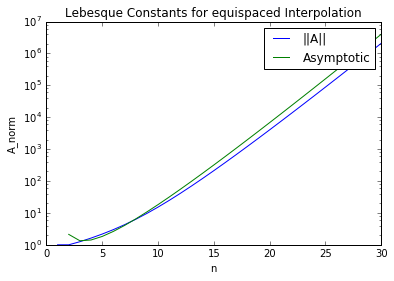

In [237]:
### INSERT CODE HERE
n = numpy.array(list(xrange(1, 31)))
m = [2*x-1 for x in n]

A_norm = []

fig = plt.figure()
axes = fig.add_subplot(1,1,1)

for i in range(0, len(n)):
    x = numpy.linspace(-1.0, 1.0, n[i])
    y = numpy.linspace(-1.0,1.0,m[i])
    A = numpy.dot(numpy.vander(y, n[i], increasing=True), numpy.linalg.inv(numpy.vander(x, increasing=True)))
    A_norm.append(numpy.linalg.norm(A, numpy.inf))    
#print A_norm

axes.set_title("Lebesque Constants for equispaced Interpolation")
axes.set_xlabel("n")
axes.set_ylabel("A_norm")

def asym(x):
    return 2**x / (numpy.exp(1)*(x-1)*numpy.log(x))
axes.semilogy(n, A_norm, label="||A||")
axes.semilogy(n[1:], asym(n[1:]), label="Asymptotic")

plt.legend()
plt.show()

**(c)** (12 points) For $n=1,2,\ldots,30$ and $m=2n-1$, what is the $\infty$-norm condition number $\kappa$ of the problem of interpolating the constant function 1?  Connect this result back to conditioning of the matrix, the order of the polynomial, and what this implies.

Hint:  Use the expression we found involving the Jacobian.

**Solution**

As per the hint, the espression we have is:

$$f(x) = Ax = [1,1, \ldots ,1]^T$$

$$J(x) = A$$

$$
    \kappa = \frac{||J(x)||_\infty}{||f(x)||_\infty / ||x||_\infty} = \frac{||J(x)||_\infty}{1/1} = ||A||_\infty =2^n / (e(n-1) \log n) \text{ as } n \rightarrow \infty
$$

Thus, since the condition number $\kappa$ is equal to $||A||_\infty$ and thus asymptotic to $2^n / (e(n-1) \log n)$, we find that as n increases, this will be ill-conditioned. As conditioning relates to perturbations to the system, this implies that small changes in our data points would drastically change our interpolant. 

## Question 2 - LU Factorization

Gaussian elimination is usually one of the first operations students learn in linear algebra but we seemed to have skipped it in lecture!  Let us fix that here in the homework.

**(a)** (10 points) By hand compute the $LU$ factorization of the matrix
$$
    A = \begin{bmatrix}
        4 & 8 & 1 \\
        8 & 20 & 4 \\
        16 & 36 & 7
    \end{bmatrix}.
$$
Make sure to compute all the way to the matrix $L$, not the components of the inverse.  You do not have to worry about pivoting.

**Solution**

The first step is to remove the values in the first column below the diagonal, to do this we can multiply by the matrix

$$
    L_1 = \begin{bmatrix}
         1 & ~ & ~  \\
        -2 & 1 & ~  \\
        -4 & ~ & 1 
    \end{bmatrix} \text{ so that } L_1 A = \begin{bmatrix}
        4 & 8 & 1 \\
        ~ & 4 & 2 \\
        ~ & 4 & 3 
    \end{bmatrix}.
$$

The next step is to remove the values below the diagonal of the second column.  This can be done with

$$
    L_2 = \begin{bmatrix}
         1 &  ~ & ~ \\
         ~ &  1 & ~ \\
         ~ & -1 & 1 
    \end{bmatrix} \text{ so that } L_2 L_1 A = \begin{bmatrix}
        4 & 8 & 1 \\
        ~ & 4 & 2 \\
        ~ & ~ & 1
    \end{bmatrix}.
$$

completing the factorization with

$$
    L^{-1} = L_2 L_1 = \begin{bmatrix}
         1 & ~ &  ~  \\
         ~ & 1 &  ~  \\
         ~ & -1 &  1  
    \end{bmatrix}
    \begin{bmatrix}
         1 & ~ & ~  \\
        -2 & 1 & ~  \\
        -4 & ~ & 1 
    \end{bmatrix} = \begin{bmatrix}
        1 & 0 &  0  \\
        -2 & 1 &  0  \\
        -2 & -1 &  1  
    \end{bmatrix}
$$

and U will be:

$$
    U = \begin{bmatrix}
        4 & 8 &  1  \\
        0 & 4 &  2  \\
        0 & 0 &  1  
    \end{bmatrix}    
$$

Taking the inverse of $L^{-1}$

$$
    L = \begin{bmatrix}
        1 & 0 &  0  \\
        2 & 1 &  0  \\
        4 & 1 &  1  
    \end{bmatrix}
$$

Thus we end up with the following LU factorization:

$$
    A = \begin{bmatrix}
        1 & 0 &  0  \\
        2 & 1 &  0  \\
        4 & 1 &  1  
    \end{bmatrix}
    \begin{bmatrix}
        4 & 8 &  1  \\
        0 & 4 &  2  \\
        0 & 0 &  1  
    \end{bmatrix} 
$$

**(b)** (12 points) Write a function that computes the $LU$ factorization of a given matrix $A \in \mathbb R^{n \times n}$ without using `numpy` or `scipy` packages beyond the `argmax` function and basic array constructors.  Make sure to also return the pivoting matrix, i.e. compute the matrices $P$, $L$, and $U$ where
$$
    P A = L U.
$$
Note that the provided function `swap_rows` may be useful although you do not have to use it.  You may also want to use the example in the notes to test your basic algorithm with (i.e. `A = numpy.array([[2, 1, 1, 0], [4, 3, 3, 1], [8, 7, 9, 5], [6, 7, 9, 8]], dtype=float)` noting that the algorithm will complain without the casting to `float`).

In [238]:
def swap_rows(i, j, A, column_indices=None):
    r"""
    Swap the ith and jth rows of the matrix A in place
    
    Optional argument column_indices is a tuple that controls 
    the columns being swapped.  Defaults to the entire row.
    """
    if column_indices is None:
        column_indices = (0, A.shape[0])
    
    pivot_row = A[i, column_indices[0]:column_indices[1]].copy()
    A[i, column_indices[0]:column_indices[1]] = A[j, column_indices[0]:column_indices[1]]
    A[j, column_indices[0]:column_indices[1]] = pivot_row


def LU_factorization(A):
    ### INSERT CODE HERE
    num_rows = A.shape[0]
    U = A.copy()
    L = numpy.identity(num_rows)
    P = numpy.identity(num_rows)
    for k in xrange(num_rows-1):
        pivot_row = numpy.argmax(numpy.abs(U[k:,k])) + k
        swap_rows(k, pivot_row, U, (k, num_rows+1))
        swap_rows(k, pivot_row, L, (0, k))
        swap_rows(k, pivot_row, P)
        for j in xrange(k+1, num_rows):
            L[j, k] = U[j,k] / U[k,k]
            U[j, k:num_rows] = U[j, k:num_rows] - L[j,k]*U[k, k:num_rows] 
    return P, L, U

In [239]:
import scipy.linalg
# Use this array if you want to check your results but remember to check the random case!
# A = numpy.array([[2, 1, 1, 0], [4, 3, 3, 1], [8, 7, 9, 5], [6, 7, 9, 8]], dtype=float)
A = numpy.random.uniform(low=1.0, high=10.0, size=(25, 25))
P, L, U = LU_factorization(A)
P_s, L_s, U_s = scipy.linalg.lu(A)
numpy.testing.assert_allclose(P, numpy.linalg.inv(P_s))
numpy.testing.assert_allclose(L, L_s)
numpy.testing.assert_allclose(U, U_s, atol=1e-8)
print "Success!"

Success!


**(c)** (10 points) For this question write a function that solves the system $A x = b$ given an $A$ and $b$ using your $LU$ factorization function and the pivot matrix.  Again do not use any of the functions from `numpy` or `scipy` beyond `dot` other than to check your solution.

In [240]:
def solve(A, b):
    ### INSERT CODE HERE
    P, L, U = LU_factorization(A)
    
    #Ly = Pb using Forward substituion
    num_rows = A.shape[0]
    y = numpy.zeros(num_rows)
    P_b = numpy.dot(P, b)
    y[0] = P_b[0]
    for i in range(1, num_rows):
        f_sub_sum = P_b[i]
        for j in range(0, i):
            f_sub_sum = f_sub_sum - L[i][j]*y[j]
        y[i] = f_sub_sum / L[i][i]
    
    #Ux = y using back substitution
    x = numpy.zeros(num_rows)
    x[num_rows-1] = y[num_rows-1] / U[num_rows-1][num_rows-1]
    for i in range(num_rows-2, -1, -1):
        back_sub_sum = y[i]
        for j in range(i+1, num_rows):
            back_sub_sum = back_sub_sum - U[i][j]*x[j]
        x[i] = back_sub_sum / U[i][i]
    return x

In [241]:
m = 10
A = numpy.random.uniform(size=(m, m))
b = numpy.random.uniform(size=(m))
x = solve(A, b)
x_n = numpy.linalg.solve(A, b)
numpy.testing.assert_allclose(x, x_n)
print "Success!"

Success!


## Question 3 - QR and Least-Squares

(15 points) Using either the modified Grahm-Schmidt orthogonalization or Householder triangularization write a function that solves the least-squares problem given a set of data and a polynomial order.  Note that this is basically the same question as before from homework 6 except this time we want to use QR factorization.  This time we have provided a plotting function should you want to use it.  Compute the resulting linear system using the appropriate substitution from question 2.

In [242]:
def compute_lstsq(data, n):
    ### INSERT CODE HERE
    """Computes the coefficients of a least-squares fit polynomial of order n
    
    :Input:
     - *data* (ndarray) - Given data x's and y's
     - *n* (integer) - Order of the polynomial
     
    :Output:
     - *p* (ndarray) - Coefficients of the least-squares polynomial
    """
    ### INSERT CODE HERE
    #Check if there are enough data points
    m = data.shape[0]
    if n > m - 1:
        raise ValueError("Error: underconstrained system")
    
    #initialize Vandermonde matrix
    A = numpy.zeros((m, n+1))
    for i in xrange(m):
        for j in xrange(n+1):
            A[i][j] = data[i][0]**j
    
    #Householder Triangularization - from class code
    R = A.copy()
    v = numpy.empty(A.shape)
    m, n = A.shape
    for k in xrange(n):
        x = R[k:, k]
        e1 = numpy.zeros(x.shape)
        e1[0] = 1.0
        v[k:, k] = numpy.sign(x[0]) * numpy.linalg.norm(x, ord=2) * e1 + x
        v[k:, k] = v[k:, k] / numpy.linalg.norm(v[k:, k], ord=2)
        R[k:, k:] -= 2.0 * numpy.dot(numpy.outer(v[k:, k], v[k:, k]), R[k:, k:])

    # Form Q
    m, n = A.shape
    Q = numpy.zeros(A.shape)
    for i in xrange(n):
        en = numpy.zeros(m)
        en[i] = 1.0
        for j in xrange(n - 1, -1, -1):
            en[j:m] -= 2.0 * numpy.dot(numpy.outer(v[j:, j], v[j:, j]), en[j:m])
        Q[:, i] = en 
    
    #print "Householder (reduced) Q = "
    #print Q
    #print "Householder (full) R = "
    #print R
    
    #p_2 = numpy.linalg.solve(R, numpy.dot(numpy.transpose(Q), data[:,1]))
    p = numpy.zeros(n)
    y = data[:,1]
    b = numpy.dot(numpy.transpose(Q), y)
    
    #back substitution to get coefficients
    p[n-1] = b[n-1] / R[n-1][n-1]
    for i in range(n-2, -1, -1):
        back_sub_sum = b[i]
        for j in range(i+1, n):
            back_sub_sum = back_sub_sum - R[i][j]*p[j]
        p[i] = back_sub_sum / R[i][i]
    return p

def plot_lstsq(data, x, p):
    P = numpy.zeros(100)
    for n in xrange(p.shape[0]):
        P += p[n] * x**n
        
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)
    axes.plot(data[:, 0], data[:, 1], 'ko', label='data')
    axes.plot(x, P, 'r', label='interpolant')
    axes.set_title("Interpolant of order %s for %s data points" % (N - 1, N))
    axes.set_xlabel("$x$")
    axes.set_ylabel("$P(x)$ and data")
    axes.legend()

Success!


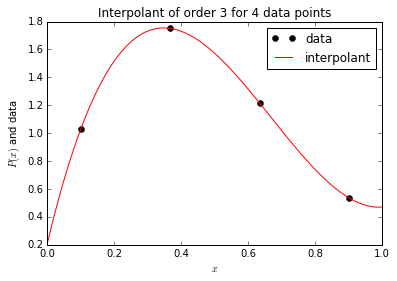

In [243]:
N = 4
N_p = 3
data = numpy.empty((N, 2))
data[:, 0] = numpy.random.uniform(size=N)
data[:, 0] = numpy.linspace(0.1, 0.9, N)
data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
p = compute_lstsq(data, N_p)
A = numpy.vander(data[:,0], N_p + 1)
# numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))
print "Success!"

# Plot result
x = numpy.linspace(0.0, 1.0, 100)
plot_lstsq(data, x, p)
plt.show()

Success!


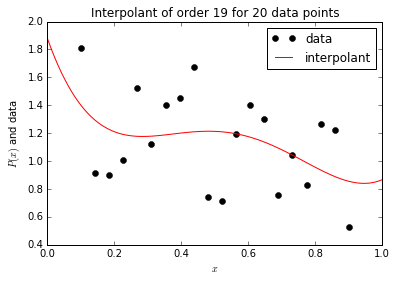

In [244]:
N = 20
N_p = 4
data = numpy.empty((N, 2))
data[:, 0] = numpy.random.uniform(size=N)
data[:, 0] = numpy.linspace(0.1, 0.9, N)
data[:, 1] = numpy.sin(numpy.exp(-data[:, 0]**2)) + numpy.random.uniform(size=N)
p = compute_lstsq(data, N_p)
A = numpy.vander(data[:,0], N_p + 1)
numpy.testing.assert_allclose(p, numpy.flipud(numpy.linalg.lstsq(A, data[:, 1])[0]))
print "Success!"

# Plot result
x = numpy.linspace(0.0, 1.0, 100)
plot_lstsq(data, x, p)
plt.show()

## Question 4 - Eigenvalues

**(a)** (12 points) Let $A$ be a $10 \times 10$ random matrix with entries from the normal distribution $R$, minus twice the identity
$$
    A = R - 2 I.
$$  
Write a function that plots $||e^{tA}||_2$ against $t$ for $0 \leq t \leq 20$ on a semilogy plot and compare it to the straight line $e^{t \alpha(A)}$ where $\alpha(A)$ is the spectral abscissa of $A$ defined as
$$
    \alpha(A) = \max_j \text{real}(\lambda_j).
$$
You can use the functions `numpy.eigvals`.

determinant is:  9169.6673091
Complex compnent of max eig val:  0.981901202976


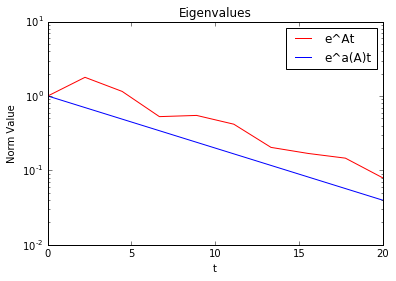

In [245]:
import scipy as sp

### INSERT CODE HERE
def plot_eigen(A):
    t = numpy.linspace(0.0,20.0,A.shape[0])
    eig_vals = numpy.linalg.eigvals(A)
    alpha = numpy.max(numpy.real(eig_vals))
    
    print "determinant is: ", numpy.linalg.det(A)
    print "Complex compnent of max eig val: ", eig_vals[numpy.argmax(numpy.real(eig_vals))].imag
    
    fig = plt.figure()
    axes = fig.add_subplot(1,1,1)
    norms = [numpy.linalg.norm(sp.linalg.expm(A * x),ord=2) for x in t]
    axes.semilogy(t, norms, 'r', label="e^At")
    axes.semilogy(t, numpy.exp(alpha * t), 'b', label="e^a(A)t")
    axes.set_title("Eigenvalues")
    axes.set_xlabel('t')
    axes.set_ylabel('Norm Value')
    plt.legend()
    plt.show()
    

n = 10
R = numpy.random.normal(size=(n,n))
A = R - 2*numpy.identity(n)
plot_eigen(A)

**(b)** (5 points) Try this with ten different matrices and comment on the results.  What property of a matrix leads to a $||e^{tA}||_2$ curve that remains oscillatory at $t \rightarrow \infty$?

determinant is:  -2772.19138319
Complex compnent of max eig val:  0.0


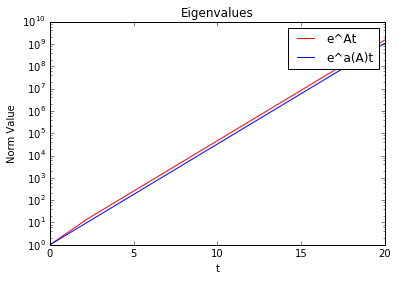

determinant is:  572.521233319
Complex compnent of max eig val:  0.0


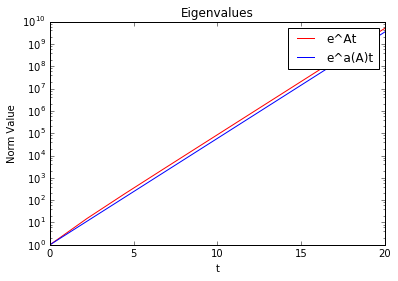

determinant is:  -1520.79729103
Complex compnent of max eig val:  0.0


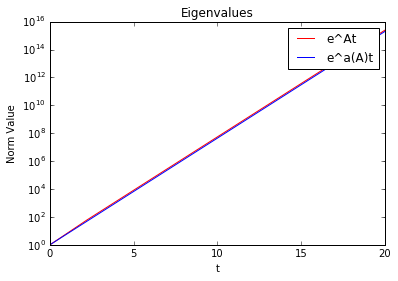

determinant is:  -5784.84281688
Complex compnent of max eig val:  0.0


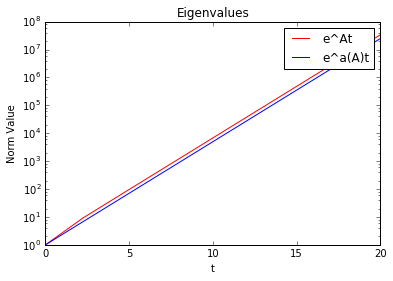

determinant is:  1642.28817246
Complex compnent of max eig val:  0.601440107973


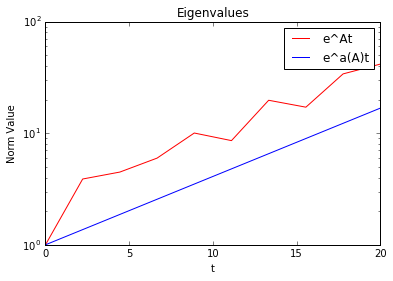

determinant is:  2001.57824891
Complex compnent of max eig val:  1.19316816328


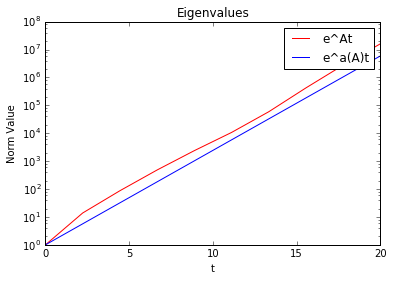

determinant is:  -0.855704931951
Complex compnent of max eig val:  0.0


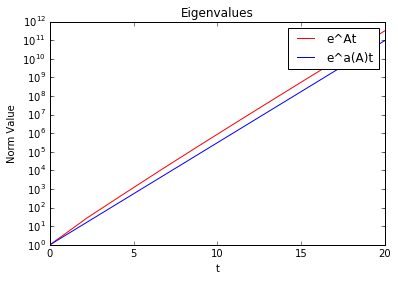

determinant is:  -4311.72547014
Complex compnent of max eig val:  0.0


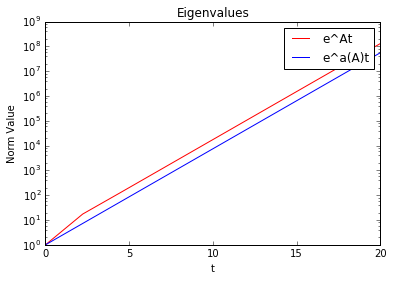

determinant is:  -6201.21687779
Complex compnent of max eig val:  0.0


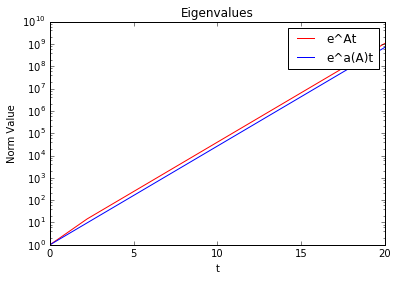

determinant is:  14779.5917958
Complex compnent of max eig val:  3.44600679244


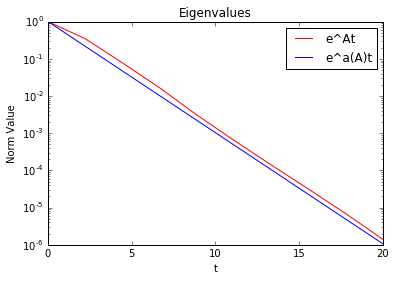

In [246]:
n = 10
for i in range(0, 10):
    R = numpy.random.normal(size=(n,n))
    A = R - 2*numpy.identity(n)
    plot_eigen(A)

**Comments**

As seen from our graphs, the largest eigenvalue will dominate the behavior of the system. Moreover, if the largest eigenvalue has an imaginary component, then the system will display oscillations. Thus, we look at the determinant for positivity or the imaginary part of the maximum eigenvalue to see if our system will oscillate. 

If there is no imaginary part, then the spectral abscissa is the same as the max eigenvalue and our curve, $||e^{tA}||_2$ lines up with the straight line, $e^{t \alpha(A)}$.

Otherwise, we can look at the equation denoted by:

$$\sqrt{Tr(A)^2 - 4det|A|}$$

If the inside of this is negative, then our eigenvalues will be imaginary. We know that the trace^2 will be positive and thus, the determinant must not only be positive but also:

$$det|A| > \frac{Tr(A)^2}{4}$$

for the system to have complex eigenvalues and oscillate.